In [2]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss,roc_auc_score,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import f1_score, recall_score, classification_report
from sklearn.metrics import fbeta_score
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from itertools import cycle
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model

In [5]:
DATA_PATH  = "/Users/akshar/Documents/College Courses/OMSA Project/GT Practicum KMAS Data"

In [7]:
data = pd.read_csv(DATA_PATH+'/features1.csv')
data.head()

,student.studentNumber,State Student ID,Birth Date,Gender,Salesforce ID,Full Name,KIPP HS Class,Enrollment: Status,Currently Enrolled School,College Graduated From,...,salesforce_student_id,ACT_Math__c,ACT_English__c,ACT_Reading__c,ACT_Science__c,ACT_Composite__c,date_taken,ACT_taken,ACT_per,percent_abc
0,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good,0.919715
1,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good,0.919715
2,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good,0.919715
3,1038131,1.018245e+09,10-19-1999,F,003C000001TDe6BIAT,NaN,2018.0,Attending,DePauw University,NaN,...,003C000001TDe6BIAT,27.0,24.0,27.0,25.0,26.0,2017-12-01,Y,Good,0.919715
4,1069072,1.027898e+09,01-02-2001,F,003C000001mmOWjIAM,NaN,2019.0,Graduated,Arizona State University,NaN,...,003C000001mmOWjIAM,18.0,23.0,19.0,19.0,20.0,2018-04-15,Y,Satisfactory,0.960463


# Since ACT performance variable that was created from ACT composite score has very less significance, we removed this variable from training.

In [8]:
data['success'] = 'na'



data.loc[(data['Enrollment: Status'].isin( ['Attending','Graduated']), 'success')] = 'Success'
data.loc[(data['Enrollment: Status'].isin( ['Did Not Enroll','Expelled','Leave of Absence','Special Circumstance','Transferred out','Unknown','Withdrawn']), 'success')] = 'Failure'


student_data = data.drop(['State Student ID'],axis=1);
student_data = student_data.drop(['Birth Date'],axis=1);
student_data = student_data.drop(['student.studentNumber'],axis=1);
#student_data = student_data.drop(['Birth Date'],axis=1);
student_data = student_data.drop(['Salesforce ID'],axis=1);
student_data = student_data.drop(['Full Name', 'KIPP HS Class'],axis=1);
student_data = student_data.drop(['Currently Enrolled School', 'College Graduated From','Enlisted in Military', 'Military Status', 'student.stateID',],axis=1);
student_data = student_data.drop(['Gender'],axis=1);
student_data = student_data.drop(['student.birthdate','student.hispanicEthnicity', 'student.raceEthnicityFed','histEnrollment.specialEdStatus', 'histEnrollment.lep'],axis=1);
student_data = student_data.drop(['salesforce_student_id'],axis=1);
student_data = student_data.drop(['date_taken'],axis=1);
student_data = student_data.drop(['Enrollment: Status'],axis=1);
student_data = student_data.drop(['ACT_per'],axis=1);
display(student_data)

,student.gender,student.grade,age,Years_Enrolled,ACT_Math__c,ACT_English__c,ACT_Reading__c,ACT_Science__c,ACT_Composite__c,ACT_taken,percent_abc,success
0,F,11,21,7,27.0,24.0,27.0,25.0,26.0,Y,0.919715,Success
1,F,11,21,7,27.0,24.0,27.0,25.0,26.0,Y,0.919715,Success
2,F,11,21,7,27.0,24.0,27.0,25.0,26.0,Y,0.919715,Success
3,F,11,21,7,27.0,24.0,27.0,25.0,26.0,Y,0.919715,Success
4,F,12,20,7,18.0,23.0,19.0,19.0,20.0,Y,0.960463,Success
...,...,...,...,...,...,...,...,...,...,...,...,...
823,F,11,20,8,19.0,23.0,18.0,19.0,20.0,Y,0.952029,Success
824,F,11,20,8,19.0,23.0,18.0,19.0,20.0,Y,0.952029,Success
825,F,11,20,8,19.0,23.0,18.0,19.0,20.0,Y,0.952029,Success
826,F,11,20,8,19.0,23.0,18.0,19.0,20.0,Y,0.952029,Success


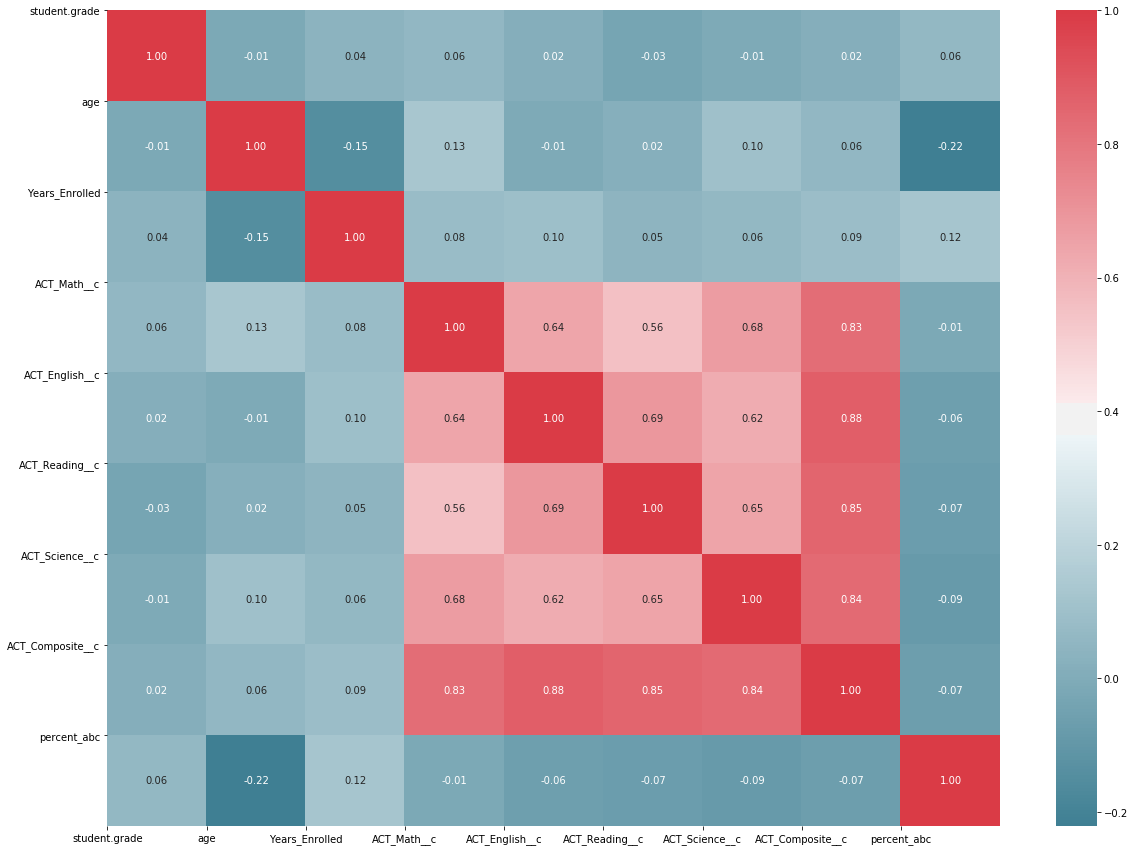

In [9]:
def correlation(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(20, 15))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.savefig('Correlation.png', bbox_inches='tight')
    plt.show()


# In[294]:


correlation(student_data)

In [10]:
train=student_data
lb=LabelEncoder()
lb.fit(train['success'])
train['success']=lb.transform(train['success'])
train = pd.get_dummies(train)

In [11]:
y=train[['success']]

train = train.drop(['success'],axis=1);

In [12]:
x_train,x_val,y_train,y_val = train_test_split(train,y,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)


(621, 13)
(621, 1)
(207, 13)
(207, 1)


In [13]:
def confusionmatrix(y_val,y_pred):
    labels = list(range(0,5))
    cm=confusion_matrix(y_val,y_pred)
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(labels); 
    ax.yaxis.set_ticklabels(labels);
    plt.savefig('confusion_matrix.png', bbox_inches='tight')
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]

    total = lambda x : x.sum()/1
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print('percentage of sensitivity = '+str(total(TPR)*100))

    # Specificity or true negative rate
    TNR = TN/(TN+FP) 

    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    print('percentage of precision = '+str(total(PPV)*100))
    # Negative predictive value
    NPV = TN/(TN+FN)

    # Fall out or false positive rate
    FPR = FP/(FP+TN)

    # False negative rate
    FNR = FN/(TP+FN)

    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print('Accuracy percentage = '+str(total(ACC)*100))


In [14]:
def ROC_plot(y_true, y_proba, plot=False):
    y_prob = y_proba[::,1]
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc_score = roc_auc_score(y_val, y_pred_proba)
    if plot:
        plt.figure(figsize=(7, 6))
        plt.plot(fpr, tpr, color='blue',
                 label='ROC (AUC = %0.4f)' % auc_score)
        plt.legend(loc='lower right')
        plt.title("ROC Curve")
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.show()

    return fpr, tpr, auc_score 
    



In [15]:
# # Fscore

# In[304]:


def Fscore(y_val,y_pred):
    print('f score = ' + str(f1_score(y_val, y_pred, average="macro")))


# # Recall

# In[305]:


def recall(y_val,y_pred):
    print('percentage of recall score = '+str(recall_score(y_val, y_pred, average="macro"))) 


# # Classification Report

# In[306]:


def report(y_val,y_pred):
    target_names = ['Success','Failure']
    print('Classification Report')
    print(classification_report(y_val, y_pred, target_names=target_names))
    

def fbeta(y_val,y_pred):
    print('Fbeta score = ' + str(fbeta_score(y_val,y_pred,average='macro', beta=0.5)))


In [72]:

def logistic_regression_model(x_train,y_train,x_val,y_val):
    lr =  LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_val)
    y_predict = lr.predict_proba(x_val)
    print("Log_Loss: ",log_loss(y_val,y_predict))
    print("Accuracy_Score: ",accuracy_score(y_val,y_pred))
    confusionmatrix(y_val,y_pred)
    Fscore(y_val,y_pred)
    recall(y_val,y_pred)
    report(y_val,y_pred)
    fbeta(y_val,y_pred)
    return lr, y_pred,y_predict


    





C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log_Loss:  0.3781657674569624
Accuracy_Score:  0.8743961352657005
percentage of sensitivity = 100.0
percentage of precision = 87.37864077669903
Accuracy percentage = 87.43961352657004
f score = 0.5020355292376018
percentage of recall score = 0.5185185185185185
Classification Report
              precision    recall  f1-score   support

     Success       1.00      0.04      0.07        27
     Failure       0.87      1.00      0.93       180

    accuracy                           0.87       207
   macro avg       0.94      0.52      0.50       207
weighted avg       0.89      0.87      0.82       207

Fbeta score = 0.5288523326050637


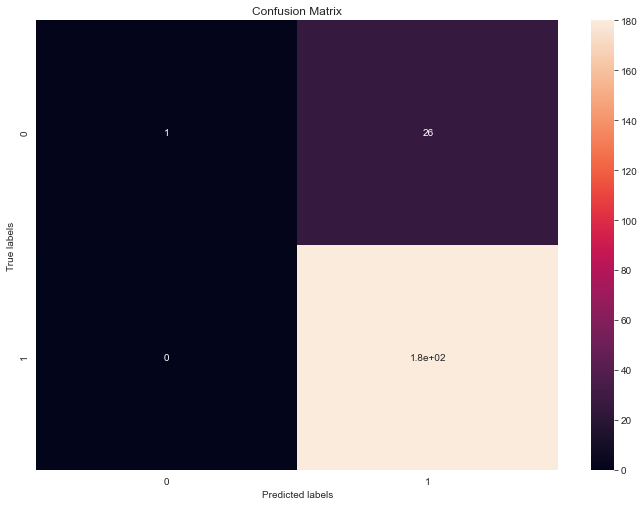

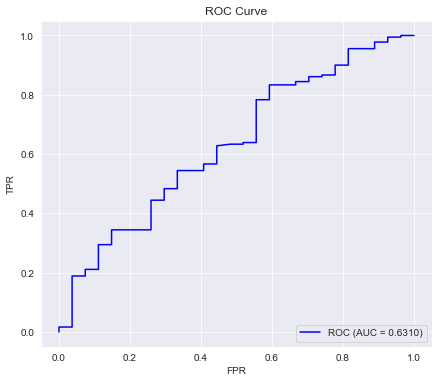

(array([0.        , 0.        , 0.        , 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.07407407, 0.07407407, 0.11111111, 0.11111111,
        0.11111111, 0.11111111, 0.11111111, 0.14814815, 0.14814815,
        0.14814815, 0.14814815, 0.25925926, 0.25925926, 0.25925926,
        0.25925926, 0.25925926, 0.25925926, 0.25925926, 0.25925926,
        0.25925926, 0.25925926, 0.2962963 , 0.2962963 , 0.33333333,
        0.33333333, 0.40740741, 0.40740741, 0.44444444, 0.44444444,
        0.48148148, 0.51851852, 0.51851852, 0.55555556, 0.55555556,
        0.55555556, 0.55555556, 0.55555556, 0.55555556, 0.55555556,
        0.55555556, 0.59259259, 0.59259259, 0.59259259, 0.59259259,
        0.59259259, 0.59259259, 0.66666667, 0.66666667, 0.7037037 ,
        0.7037037 , 0.74074074, 0.74074074, 0.77777778, 0.77777778,
        0.81481481, 0.81481481, 0.81481481, 0.81

In [116]:
model,y_pred,y_proba =logistic_regression_model(x_train,y_train,x_val,y_val)
ROC_plot(y_val,y_proba,plot = True)

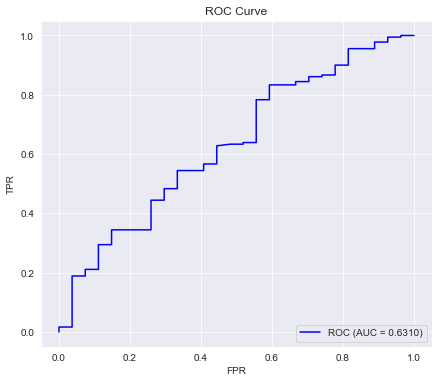

(array([0.        , 0.        , 0.        , 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.07407407, 0.07407407, 0.11111111, 0.11111111,
        0.11111111, 0.11111111, 0.11111111, 0.14814815, 0.14814815,
        0.14814815, 0.14814815, 0.25925926, 0.25925926, 0.25925926,
        0.25925926, 0.25925926, 0.25925926, 0.25925926, 0.25925926,
        0.25925926, 0.25925926, 0.2962963 , 0.2962963 , 0.33333333,
        0.33333333, 0.40740741, 0.40740741, 0.44444444, 0.44444444,
        0.48148148, 0.51851852, 0.51851852, 0.55555556, 0.55555556,
        0.55555556, 0.55555556, 0.55555556, 0.55555556, 0.55555556,
        0.55555556, 0.59259259, 0.59259259, 0.59259259, 0.59259259,
        0.59259259, 0.59259259, 0.66666667, 0.66666667, 0.7037037 ,
        0.7037037 , 0.74074074, 0.74074074, 0.77777778, 0.77777778,
        0.81481481, 0.81481481, 0.81481481, 0.81

In [109]:
def compute_roc(y_true, y_proba, plot=False):
    """
    TODO
    :param y_true: ground truth
    :param y_pred: predictions
    :param plot:
    :return:
    """
    y_pred_proba = y_proba[::,1]
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc_score =  roc_auc_score(y_val, y_pred_proba)
    if plot:
        plt.figure(figsize=(7, 6))
        plt.plot(fpr, tpr, color='blue',
                 label='ROC (AUC = %0.4f)' % auc_score)
        plt.legend(loc='lower right')
        plt.title("ROC Curve")
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.show()

    return fpr, tpr, auc_score 
compute_roc(y_val, y_proba,plot=True)

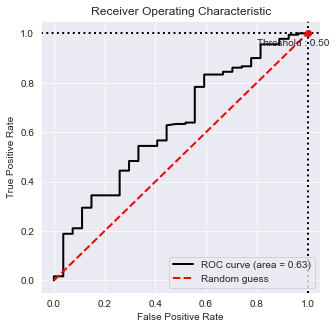

In [91]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_val, y_pred_proba, labels=["Success", "Failure"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [117]:

# # RANDOM FOREST

# In[311]:


def random_forest_model(x_train,y_train,x_val,y_val):
    random_forest = RandomForestClassifier(n_estimators=28,max_depth=5,random_state=0)

    forest = random_forest.fit(x_train, y_train)
    print("Random Forest Train data Score" , ":" , forest.score(x_train, y_train) 
          , "," ,"Validation data Score" ,":" , forest.score(x_val, y_val))
    Y_pred = random_forest.predict_proba(x_val)
    Y_pred1 = random_forest.predict(x_val)
    print("Log_Loss: ",log_loss(y_val,Y_pred))
    confusionmatrix(y_val,Y_pred1)
    Fscore(y_val,Y_pred1)
    recall(y_val,Y_pred1)
    report(y_val,Y_pred1)
    fbeta(y_val,Y_pred1)
    return forest,Y_pred1,Y_pred


# In[312]:




C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Random Forest Train data Score : 0.8792270531400966 , Validation data Score : 0.8792270531400966
Log_Loss:  0.33319180508922225
percentage of sensitivity = 100.0
percentage of precision = 87.8048780487805
Accuracy percentage = 87.92270531400966
f score = 0.5364979847738469
percentage of recall score = 0.537037037037037
Classification Report
              precision    recall  f1-score   support

     Success       1.00      0.07      0.14        27
     Failure       0.88      1.00      0.94       180

    accuracy                           0.88       207
   macro avg       0.94      0.54      0.54       207
weighted avg       0.89      0.88      0.83       207

Fbeta score = 0.592857142857143


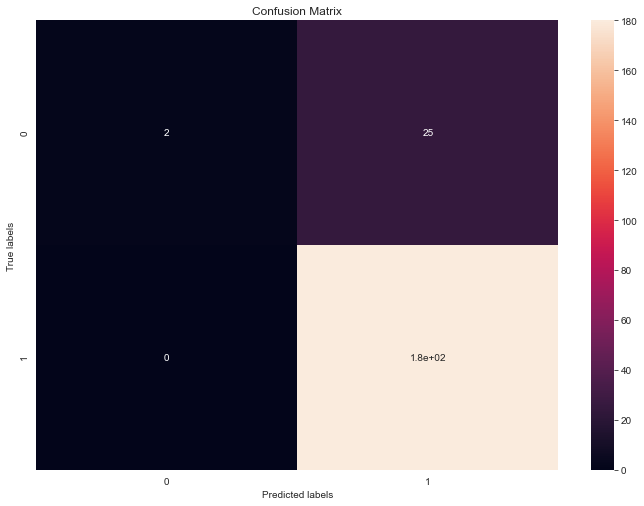

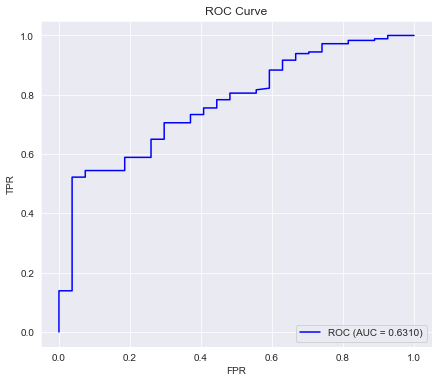

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.07407407,
        0.07407407, 0.18518519, 0.18518519, 0.25925926, 0.25925926,
        0.25925926, 0.25925926, 0.25925926, 0.25925926, 0.2962963 ,
        0.2962963 , 0.37037037, 0.37037037, 0.37037037, 0.40740741,
        0.40740741, 0.40740741, 0.44444444, 0.44444444, 0.48148148,
        0.48148148, 0.55555556, 0.55555556, 0.59259259, 0.59259259,
        0.59259259, 0.59259259, 0.59259259, 0.59259259, 0.62962963,
        0.62962963, 0.62962963, 0.62962963, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 0.7037037 , 0.70

In [118]:
model,y_pred,y_proba = random_forest_model(x_train,y_train,x_val,y_val)
ROC_plot(y_val,y_proba,plot = True)

In [122]:
def SVM_Model(X_train,Y_train,X_test,y_val):
    svc = SVC(probability=True)
    svc.fit(X_train, Y_train)
    Y_pred = svc.predict(X_test)
    Y_pred1 = svc.predict_proba(X_test)
    print("SVM Train data Score" , ":" , svc.score(X_train, y_train)
          , "," ,"Validation data Score" ,":" , svc.score(X_test, y_val))
    confusionmatrix(y_val,Y_pred)
    Fscore(y_val,Y_pred)
    recall(y_val,Y_pred)
    report(y_val,Y_pred)
    fbeta(y_val,Y_pred)
    return svc,Y_pred,Y_pred1


C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVM Train data Score : 0.8679549114331723 , Validation data Score : 0.8695652173913043
percentage of sensitivity = 100.0
percentage of precision = 86.95652173913044
Accuracy percentage = 86.95652173913044
f score = 0.46511627906976744
percentage of recall score = 0.5
Classification Report
              precision    recall  f1-score   support

     Success       0.00      0.00      0.00        27
     Failure       0.87      1.00      0.93       180

    accuracy                           0.87       207
   macro avg       0.43      0.50      0.47       207
weighted avg       0.76      0.87      0.81       207

Fbeta score = 0.4464285714285714


C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


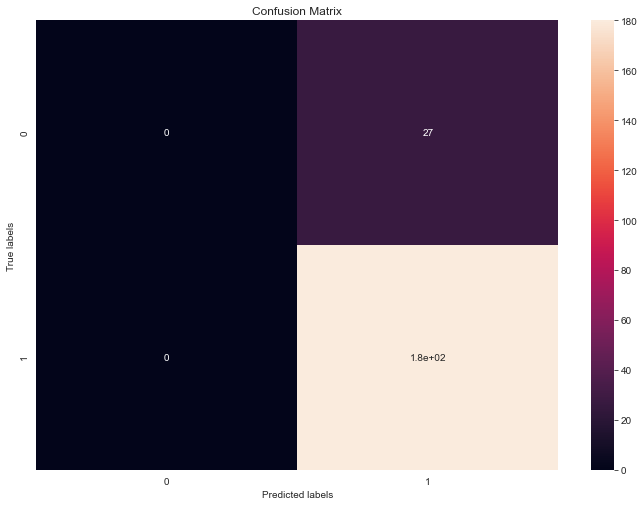

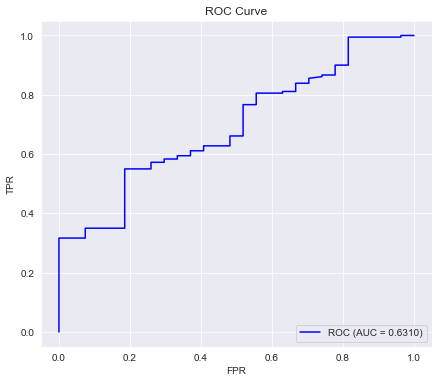

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07407407, 0.07407407,
        0.18518519, 0.18518519, 0.18518519, 0.18518519, 0.18518519,
        0.18518519, 0.18518519, 0.18518519, 0.25925926, 0.25925926,
        0.25925926, 0.25925926, 0.2962963 , 0.2962963 , 0.33333333,
        0.33333333, 0.37037037, 0.37037037, 0.40740741, 0.40740741,
        0.40740741, 0.48148148, 0.48148148, 0.48148148, 0.51851852,
        0.51851852, 0.51851852, 0.51851852, 0.51851852, 0.55555556,
        0.55555556, 0.55555556, 0.55555556, 0.62962963, 0.62962963,
        0.66666667, 0.66666667, 0.7037037 , 0.7037037 , 0.74074074,
        0.74074074, 0.77777778, 0.77777778, 0.81481481, 0.81481481,
        0.81481481, 0.81481481, 0.81481481, 0.88

In [123]:
model,y_pred,y_proba = SVM_Model(x_train,y_train,x_val,y_val)
ROC_plot(y_val,y_proba,plot = True)


In [124]:

def Decison_tree_Model(x_train,y_train,x_val,y_val):
    tree = DecisionTreeClassifier(min_samples_leaf=9,random_state=0)
    tf= tree.fit(x_train, y_train)
    y_pred = tf.predict(x_val)
    y_predict = tf.predict_proba(x_val)
    print("Decisioin Tree Train data Score" , ":" , tf.score(x_train, y_train) 
          , "," , "Validation data Score" ,":" , tf.score(x_val, y_val))
    confusionmatrix(y_val,y_pred)
    print("Log_Loss: ",log_loss(y_val,y_predict))
    Fscore(y_val,y_pred)
    recall(y_val,y_pred)
    report(y_val,y_pred)
    fbeta(y_val,y_pred)
    return tree,y_pred,y_predict


Decisioin Tree Train data Score : 0.8856682769726248 , Validation data Score : 0.7681159420289855
percentage of sensitivity = 86.11111111111111
percentage of precision = 87.07865168539325
Accuracy percentage = 76.81159420289855
Log_Loss:  1.1208525784654573
f score = 0.5043894652833201
percentage of recall score = 0.5046296296296297
Classification Report
              precision    recall  f1-score   support

     Success       0.14      0.15      0.14        27
     Failure       0.87      0.86      0.87       180

    accuracy                           0.77       207
   macro avg       0.50      0.50      0.50       207
weighted avg       0.78      0.77      0.77       207

Fbeta score = 0.5043471102888143


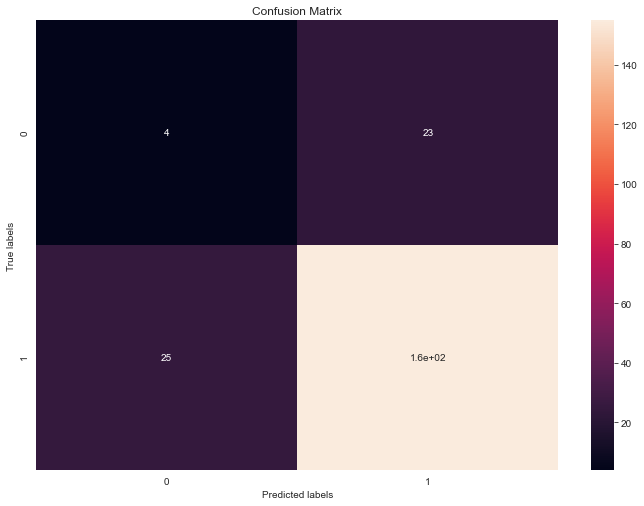

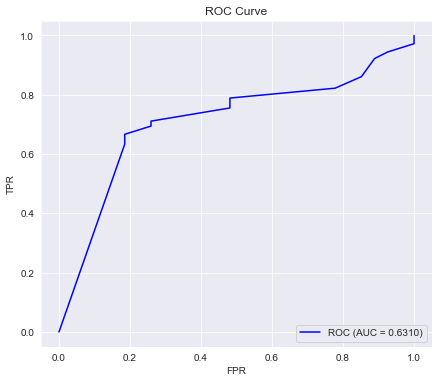

(array([0.        , 0.18518519, 0.18518519, 0.25925926, 0.25925926,
        0.48148148, 0.48148148, 0.77777778, 0.85185185, 0.88888889,
        0.92592593, 1.        , 1.        , 1.        ]),
 array([0.        , 0.63333333, 0.66666667, 0.69444444, 0.71111111,
        0.75555556, 0.78888889, 0.82222222, 0.86111111, 0.92222222,
        0.94444444, 0.97222222, 0.98333333, 1.        ]),
 0.6309670781893003)

In [125]:
model,y_pred,y_proba = Decison_tree_Model(x_train,y_train,x_val,y_val)
ROC_plot(y_val,y_proba,plot = True)

In [128]:
# # ADA BOOST



def ada_boost_model(x_train,y_train,x_val,y_val):
    ada = AdaBoostClassifier(n_estimators=2)
    af = ada.fit(x_train, y_train)
    y_pred = af.predict(x_val)
    y_predict = af.predict_proba(x_val)
    print("Ada Boost Train data Score" , ":" , af.score(x_train, y_train) 
          , "," ,"Validation data Score" ,":" , af.score(x_val, y_val))
    print("Log_Loss: ",log_loss(y_val,y_predict))
    confusionmatrix(y_val,y_pred)
    Fscore(y_val,y_pred)
    recall(y_val,y_pred)
    report(y_val,y_pred)
    fbeta(y_val,y_pred)
    return ada,y_pred,y_predict

C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Ada Boost Train data Score : 0.8679549114331723 , Validation data Score : 0.8695652173913043
Log_Loss:  0.42781328542257946
percentage of sensitivity = 100.0
percentage of precision = 86.95652173913044
Accuracy percentage = 86.95652173913044
f score = 0.46511627906976744
percentage of recall score = 0.5
Classification Report
              precision    recall  f1-score   support

     Success       0.00      0.00      0.00        27
     Failure       0.87      1.00      0.93       180

    accuracy                           0.87       207
   macro avg       0.43      0.50      0.47       207
weighted avg       0.76      0.87      0.81       207

Fbeta score = 0.4464285714285714


C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\q843377\AppData\Local\Continuum\anaconda3\envs\hw5\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


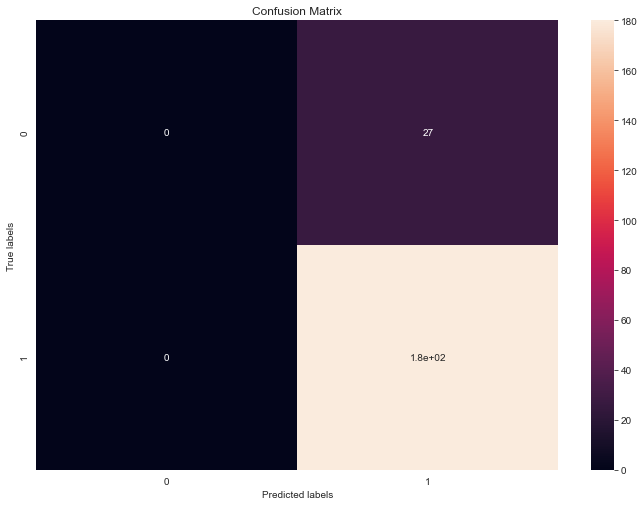

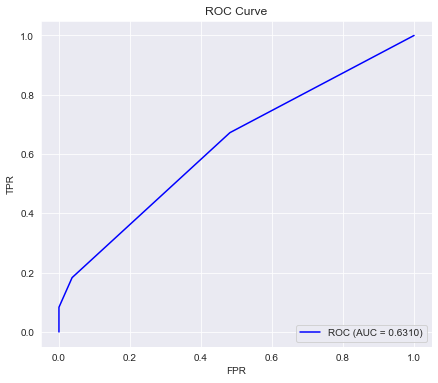

(array([0.        , 0.        , 0.03703704, 0.48148148, 1.        ]),
 array([0.        , 0.08333333, 0.18333333, 0.67222222, 1.        ]),
 0.6309670781893003)

In [129]:
model,y_pred,y_proba = ada_boost_model(x_train,y_train,x_val,y_val)
ROC_plot(y_val,y_proba,plot = True)

In [20]:
from xgboost import plot_tree

def XGBoost(x_train,y_train,x_val,y_val):
    model = XGBClassifier()
    model = XGBClassifier(learning_rate=0.1,n_estimators=80)
    mf = model.fit(x_train,y_train)
    y_pred=model.predict(x_val)
    y_predict = mf.predict_proba(x_val)
    print("XGBoost Train data Score" , ":" , mf.score(x_train, y_train) 
          , "," ,"Validation data Score" ,":" , mf.score(x_val, y_val))
    print("Log_Loss: ",log_loss(y_val,y_predict))
    confusionmatrix(y_val,y_pred)
    Fscore(y_val,y_pred)
    recall(y_val,y_pred)
    report(y_val,y_pred)
    fbeta(y_val,y_pred)
    
    
    # plot feature importance
    fig, ax = plt.subplots(figsize=(10, 20))
    plot_importance(model, ax=ax)
    plt.savefig('Feature_Engineering.png', bbox_inches='tight')
    plt.show()
    return model,y_pred,y_predict
    


In [24]:
!conda install graphviz

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::python-language-server==0.31.7=py37_0
  - defaults/osx-64::matplotlib==3.1.3=py37_0
  - defaults/osx-64::bokeh==1.4.0=py37_0
  - defaults/osx-64::notebook==6.0.3=py37_0
  - defaults/noarch::flask==1.1.1=py_0
  - defaults/osx-64::jupyter==1.0.0=py37_7
  - defaults/osx-64::spyder==4.0.1=py37_0
  - defaults/osx-64::widgetsnbextension==3.5.1=py37_0
  - defaults/noarch::backports.functools_lru_cache==1.6.1=py_0
  - defaults/osx-64::nose==1.3.7=py37_2
  - defaults/noarch::sphinx==2.4.0=py_0
  - defaults/noarch::networkx==2.4=py_0
  - defaults/noarch::pytest-astropy==0.8.0=py_0
  - defaults/noarch::jupyter_console==6.1.0=py_0
  - defaults/osx-64::astropy==4.0=py37h1de35cc_0
  - defaults/osx-64::clyent==1.2.2=py37_1
  - defaults/osx-64::pytest-arraydiff==0.3=py37h39e3cac_0
  - defaults/noarch::ipywidgets==7.5.1=py_0
  - def

Proceed ([y]/n)? ^C

CondaSystemExit: 
Operation aborted.  Exiting.



/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBoost Train data Score : 0.9066022544283414 , Validation data Score : 0.8647342995169082
Log_Loss:  0.3099789952112425
percentage of sensitivity = 98.88888888888889
percentage of precision = 87.25490196078431
Accuracy percentage = 86.47342995169082
f score = 0.496875
percentage of recall score = 0.512962962962963
Classification Report
              precision    recall  f1-score   support

     Success       0.33      0.04      0.07        27
     Failure       0.87      0.99      0.93       180

    accuracy                           0.86       207
   macro avg       0.60      0.51      0.50       207
weighted avg       0.80      0.86      0.81       207

Fbeta score = 0.5108897126969416


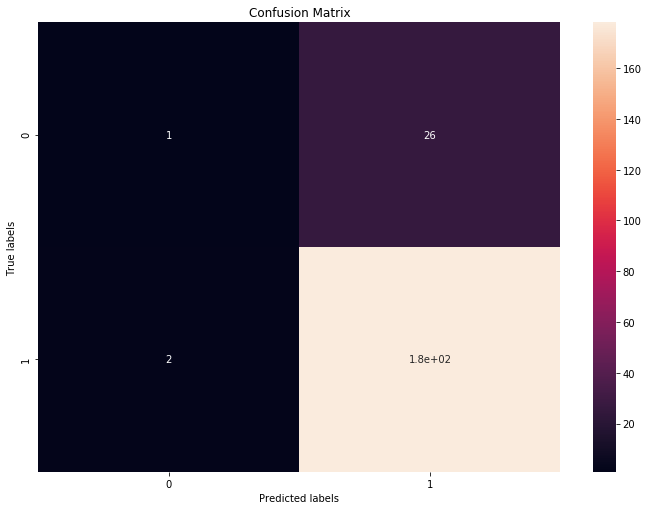

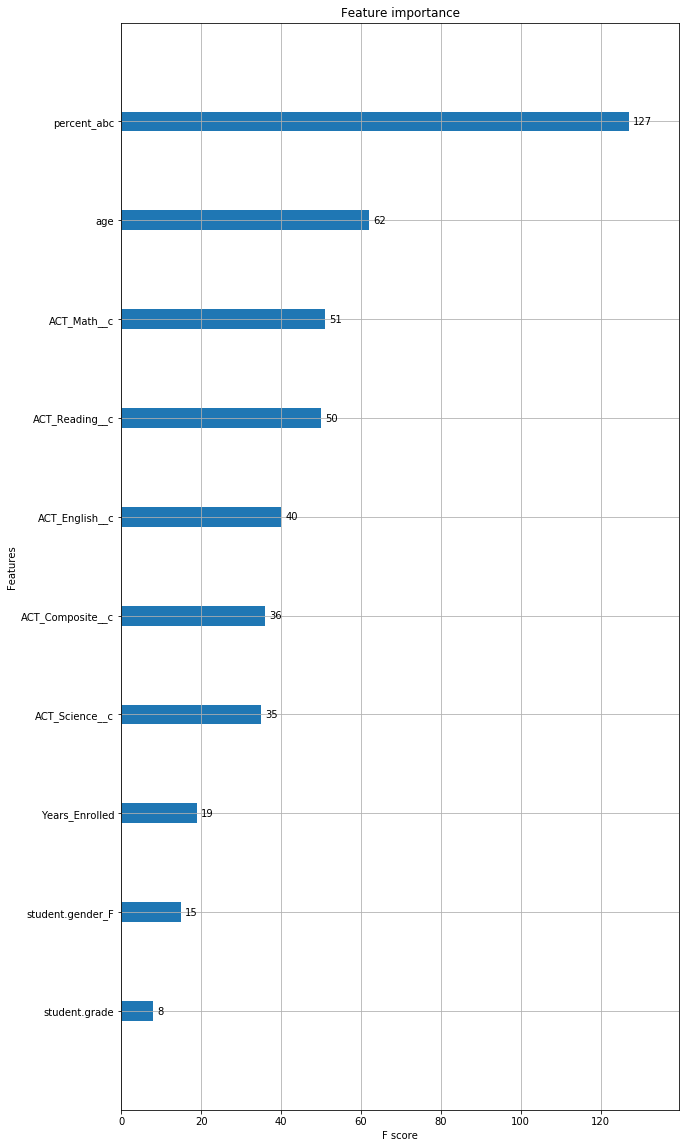

ImportError: You must install graphviz to plot tree

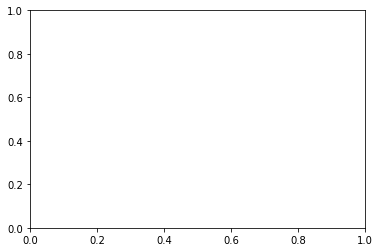

In [25]:
model,y_pred,y_proba = XGBoost(x_train,y_train,x_val,y_val)
plot_tree(model)
ROC_plot(y_val,y_proba,plot = True)

In [ ]:

# # K Cross Validations

# In[325]:


def k_cross_validations(x_train,y_train,):
    X = x_train
    y = y_train
    kf = KFold(n_splits=10) # Define the split - into 2 folds 
    kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
    print(kf) 
    KFold(n_splits=10, random_state=None, shuffle=False)
    return kf


# In[326]:


kf = k_cross_validations(x_train,y_train)
classifier = model
cross_val_score(classifier,x_train, y_train, cv=kf, n_jobs=1)
